# Simple Decision Tree
## Answer: Test accuracy = 82%

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import PIL.Image as Image
import matplotlib.pyplot as plt

with np.load('trainfeature.npz', allow_pickle=False) as npz_file:
    traindata = dict(npz_file.items())

X_tr = traindata['features']
y_tr = traindata['targets']

with np.load('validfeature.npz', allow_pickle=False) as npz_file:
    validdata = dict(npz_file.items())

X_va = validdata['features']
y_va = validdata['targets']

with np.load('testfeature.npz', allow_pickle=False) as npz_file:
    testdata = dict(npz_file.items())

X_te = testdata['features']
y_te = testdata['targets']

## 1. What accuracy can you achieve with a depth of 3?
### Answer: Validation accuracy: 0.6474820143884892 and test accuracy: 0.68.

In [2]:
# Create decision tree
dt = DecisionTreeClassifier(
    criterion='gini', max_depth=3, random_state=0)

# Fit decision tree
dt.fit(X_tr, y_tr)

print('Validation accuracy:',dt.score(X_va, y_va),'. Test accuracy:',dt.score(X_te, y_te))

Validation accuracy: 0.6474820143884892 . Test accuracy: 0.68


## 2. Plot the corresponding tree with graphviz

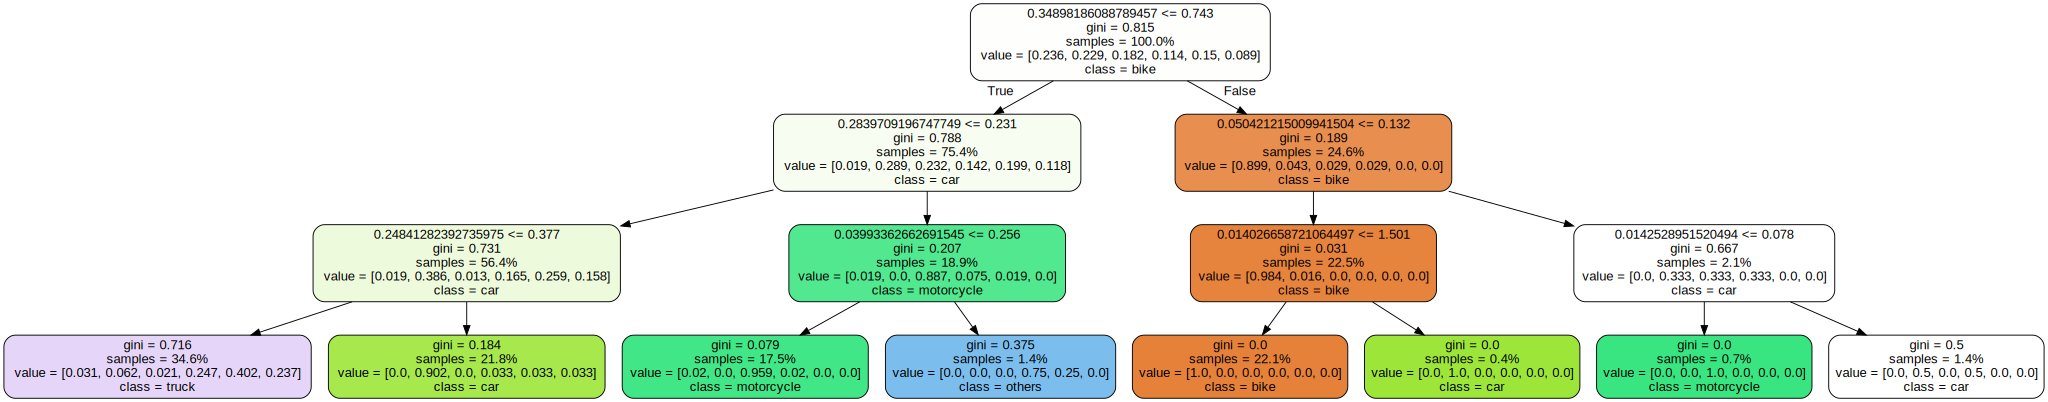

In [3]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    dt, out_file=None,
    feature_names=dt.feature_importances_, class_names=['bike', 'car','motorcycle','others','truck','van'],
    filled=True, rounded=True, proportion=True   
)

import graphviz
graphviz.Source(dot_data)

## 3. Do you get better results if you reduce the number of dimensions with PCA first?
### Answer: Yes, the reduction of dimension using PCA before applying decision tree classifier does improve the test accuracy. 

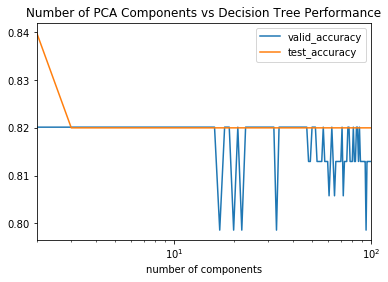

In [4]:
from sklearn.decomposition import PCA

gs_results = []

ncom = np.arange(2,101,1)

for n in ncom:
    # Fit random forest model
    # create PCA using only 2 components
    pca = PCA(n_components=n)
    X_pca_tr = pca.fit_transform(X_tr)
    X_pca_va = pca.transform(X_va)
    X_pca_te = pca.transform(X_te)
    dt.fit(X_pca_tr, y_tr)
        
    # Save model and its performance on valid and test sets
    gs_results.append({
        'number of components': n,
        'valid_accuracy': dt.score(X_pca_va,y_va),
        'test_accuracy': dt.score(X_pca_te,y_te)
    })
    
gs_results = pd.DataFrame(gs_results)
gs_results.sort_values(by='test_accuracy', ascending=False).head()

gs_results.plot(x='number of components',y=['valid_accuracy','test_accuracy'],title='Number of PCA Components vs Decision Tree Performance',logx=True)